In [2]:
#Brittany Roberts
#DSC410
#Exercise 6.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_6/data/startups_profit.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,"$192,261.83"
1,162597.70,151377.59,443898.53,California,"$191,792.06"
2,153441.51,101145.55,407934.54,FL,"$191,050.39"
3,144372.41,118671.85,383199.62,New York,"$182,901.99"
4,142107.34,91391.77,366168.42,FL,"$166,187.94"
5,131876.90,99814.71,362861.36,New York,"$156,991.12"
6,134615.46,147198.87,127716.82,California,"$156,122.51"
7,130298.13,145530.06,323876.68,FL,"$155,752.60"
8,120542.52,148718.95,311613.29,New York,"$152,211.77"
9,123334.88,108679.17,304981.62,California,"$149,759.96"


In [25]:
#check column names
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', ' Profit '], dtype='object')

In [30]:
df[' Profit '] = df[' Profit '].astype(str).str.replace('[(,),$,%]', '',regex=True)
df[' Profit '] = df[' Profit '].astype(float)

In [31]:
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', ' Profit ']
categorical_features = ['State']

In [32]:
#univariate EDA for numerical feautres

def desc_num_features(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax,
**kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, df[feature_name].describe().round(2).all,
size=17)

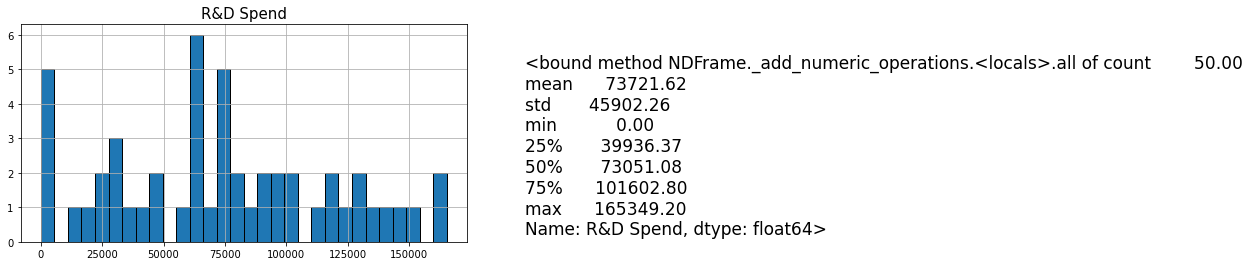

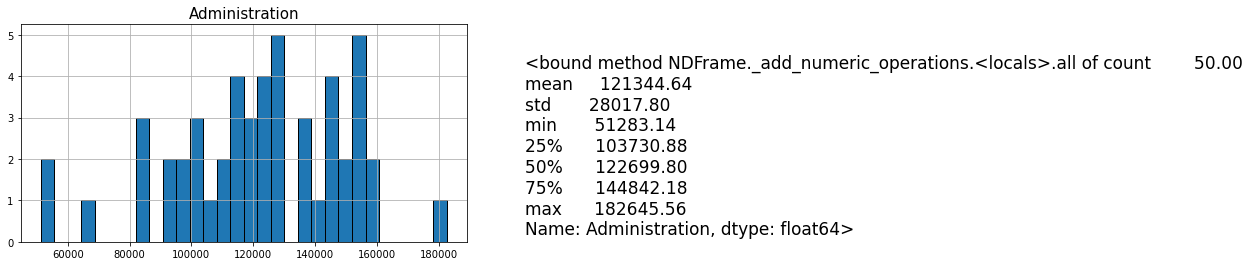

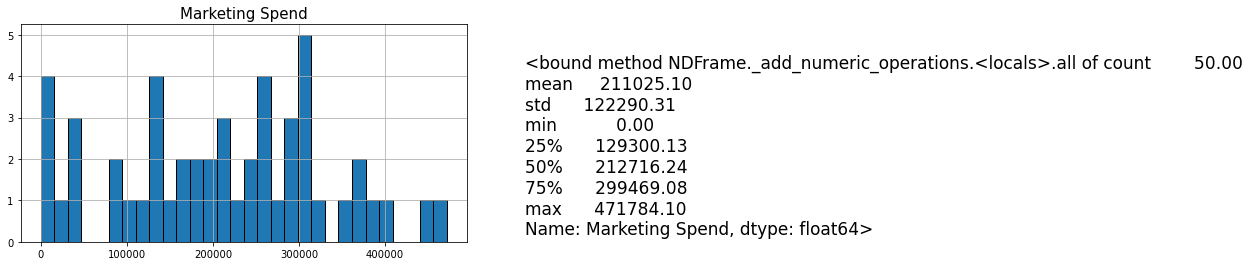

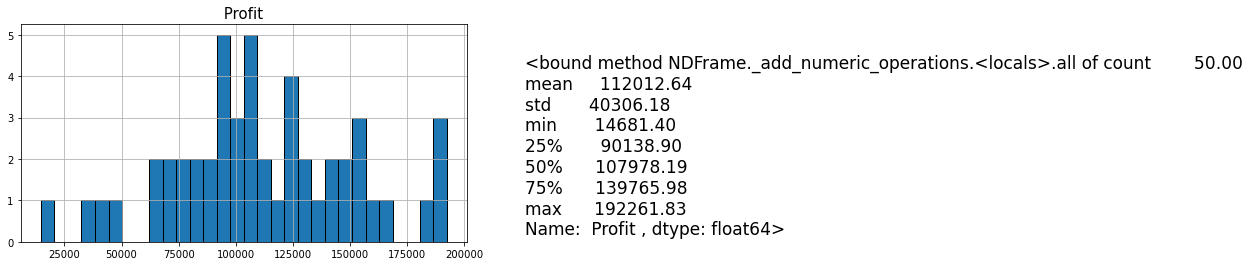

In [33]:
for x in numerical_features:
    desc_num_features(x)

            count  percent
State                     
California     17     34.0
New York       17     34.0
FL             16     32.0


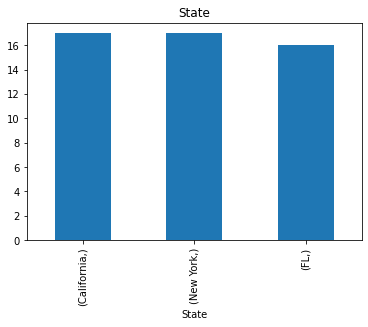

In [41]:
count = df[categorical_features].value_counts()
percent = 100*df[categorical_features].value_counts(normalize=True)
df1 = pd.DataFrame({'count' :count, 'percent' :percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, subplots=True);

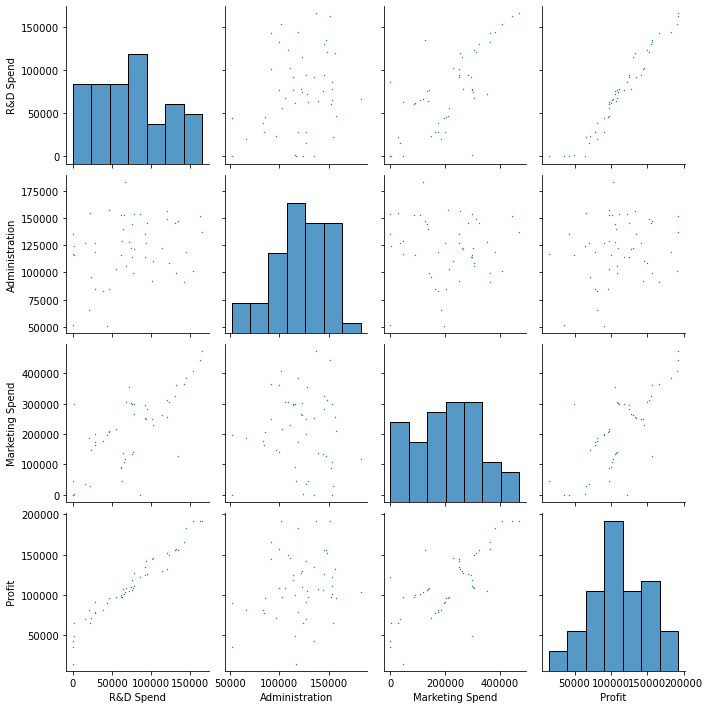

In [42]:
# bivariate EDA for numerical features

sns.pairplot(df[numerical_features], plot_kws={'s': 2});

In [43]:
# correlation of numerical features

df[numerical_features].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


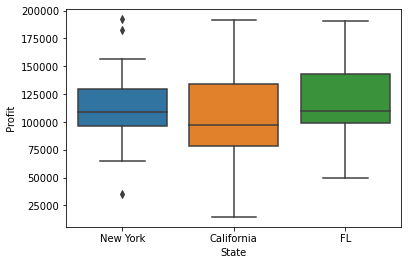

In [46]:
# bivariate EDA for numerical and categorical features

sns.boxplot(x='State', y= ' Profit ', data=df);

In [47]:
df.groupby('State')[' Profit '].agg(np.median).sort_values()

State
California     97427.84
New York      108552.04
FL            109543.12
Name:  Profit , dtype: float64

In [71]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df[' Profit ']

X.shape

(50, 3)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [67]:
# standardize data

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 1.9702285 ,  0.52354592,  2.10783694],
       [-0.98097198, -0.10773551, -0.28660741],
       [ 0.4257496 ,  0.19409247,  0.33039647],
       [-0.18478445,  1.07854797, -0.81242283],
       [ 1.00215777,  0.9301814 ,  0.82511141],
       [ 0.09142004,  1.10405034,  0.73000265],
       [-1.60222366,  0.47294916, -1.67043894],
       [ 0.57284439, -1.02809529,  0.32963654],
       [-0.99958317, -1.27163454, -0.35327773],
       [ 1.24704272, -0.75207445,  1.23553081],
       [ 1.91078097,  1.02163589,  1.88451577],
       [ 1.30621068,  0.8778922 , -0.6476207 ],
       [-0.0443029 ,  0.21281136,  1.1580283 ],
       [-1.60222366, -0.16147531, -1.30867116],
       [ 0.06235071, -0.77042183, -0.54464768],
       [-0.28134159,  1.06719149, -0.96394457],
       [ 0.87211621,  0.0322955 ,  0.42599207],
       [-0.60806775, -1.26005344, -0.024554  ],
       [ 0.02529425,  0.77253191, -0.59690096],
       [ 1.21293261,  0.82048684,  0.92332259],
       [ 0.04527912, -0.26867973,  0.721

In [68]:
# linear regression

from sklearn.linear_model import LinearRegression

ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred_ml_mg = ml_reg.predict(X_train)

In [69]:
pd.Series(ml_reg.coef_,
          index=X_train.columns).sort_values(ascending=False).round(2)

R&D Spend          0.78
Marketing Spend    0.04
Administration    -0.01
dtype: float64

In [85]:
# Evaluation of model - mean sqaured error

from sklearn.metrics import mean_squared_error

y_pred = ml_reg.predict(X_test)
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_mg)
format(mse_ml_reg, ".2f")

'81431581.00'

In [86]:
# evaluating against null model

y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true=y_train,
                                    y_pred=y_pred_null_model)
format(mse_null_model, ".2f")

'1638635049.09'

In [87]:
# Evaluation of model - mean absolute error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
format(mae, '.2f')

'6839.55'

In [88]:
# Evaluation of Model - R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
format(r2, '.2f')

'0.95'

In [89]:
# Cross-fold validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

scaler= StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
format(mae, '.2f')

'7379.90'

In [90]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(ml_reg, X, y,
                            scoring='neg_mean_absolute_error', cv=10)
scores = -1*cv_results['test_score']

In [91]:
scores.mean()

7817.584722830846